[[ 5.1  3.5]
 [ 4.9  3. ]
 [ 4.7  3.2]
 [ 4.6  3.1]
 [ 5.   3.6]
 [ 5.4  3.9]
 [ 4.6  3.4]
 [ 5.   3.4]
 [ 4.4  2.9]
 [ 4.9  3.1]
 [ 5.4  3.7]
 [ 4.8  3.4]
 [ 4.8  3. ]
 [ 4.3  3. ]
 [ 5.8  4. ]
 [ 5.7  4.4]
 [ 5.4  3.9]
 [ 5.1  3.5]
 [ 5.7  3.8]
 [ 5.1  3.8]
 [ 5.4  3.4]
 [ 5.1  3.7]
 [ 4.6  3.6]
 [ 5.1  3.3]
 [ 4.8  3.4]
 [ 5.   3. ]
 [ 5.   3.4]
 [ 5.2  3.5]
 [ 5.2  3.4]
 [ 4.7  3.2]
 [ 4.8  3.1]
 [ 5.4  3.4]
 [ 5.2  4.1]
 [ 5.5  4.2]
 [ 4.9  3.1]
 [ 5.   3.2]
 [ 5.5  3.5]
 [ 4.9  3.1]
 [ 4.4  3. ]
 [ 5.1  3.4]
 [ 5.   3.5]
 [ 4.5  2.3]
 [ 4.4  3.2]
 [ 5.   3.5]
 [ 5.1  3.8]
 [ 4.8  3. ]
 [ 5.1  3.8]
 [ 4.6  3.2]
 [ 5.3  3.7]
 [ 5.   3.3]
 [ 7.   3.2]
 [ 6.4  3.2]
 [ 6.9  3.1]
 [ 5.5  2.3]
 [ 6.5  2.8]
 [ 5.7  2.8]
 [ 6.3  3.3]
 [ 4.9  2.4]
 [ 6.6  2.9]
 [ 5.2  2.7]
 [ 5.   2. ]
 [ 5.9  3. ]
 [ 6.   2.2]
 [ 6.1  2.9]
 [ 5.6  2.9]
 [ 6.7  3.1]
 [ 5.6  3. ]
 [ 5.8  2.7]
 [ 6.2  2.2]
 [ 5.6  2.5]
 [ 5.9  3.2]
 [ 6.1  2.8]
 [ 6.3  2.5]
 [ 6.1  2.8]
 [ 6.4  2.9]
 [ 6.6  3. ]
 [ 6.8  2.8]

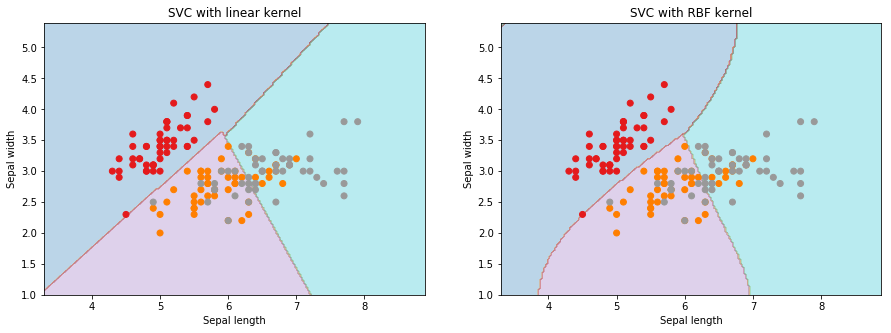

In [5]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
%matplotlib inline
import matplotlib as mp
import matplotlib.pyplot as plt


iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features.
y = iris.target
print(X)
print(y)
# Plot resulting Support Vector boundaries with original data
# Create fake input data for prediction that we will use for plotting
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

# Create the SVC model object
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C, decision_function_shape='ovr').fit(X, y)
Z = svc.predict(X_plot)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')

# Create the SVC model object
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='rbf', C=C, decision_function_shape='ovr').fit(X, y)

Z = svc.predict(X_plot)
Z = Z.reshape(xx.shape)

plt.subplot(122)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel')

KNN

In [9]:
from sklearn.cross_validation import train_test_split

X = iris.data[:, :4] # we only take the first two features.
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=99)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, pred))

0.3


In [25]:
from sklearn.model_selection import cross_val_score

neighbors = [x for x in range(1,50) if x %2 != 0]

cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

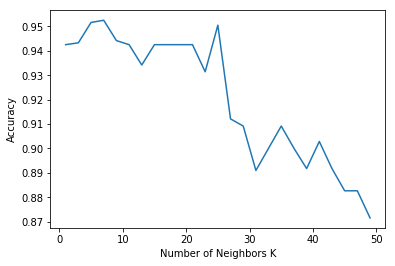

In [26]:
# plot misclassification error vs k
plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.show()

In [28]:
2*np.argmax(np.array(cv_scores))+1

7